In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

In [2]:
from sklearn.datasets import fetch_california_housing

ds = fetch_california_housing()
ds.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [3]:
X = ds.data
y = ds.target

In [4]:
X.shape

(20640, 8)

In [5]:
y.shape

(20640,)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
from tensorflow.keras.models import Sequential
help(Sequential)

Help on class Sequential in module keras.src.engine.sequential:

class Sequential(keras.src.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the initial `Input`.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8))
 |  model.add(tf.keras.layers.Dense(4))
 |  # model.weights not created yet
 |  
 |  # Whereas if you specify an `Input`, the model gets built
 |  # continuously as you are adding layers:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(s

In [9]:
from tensorflow.keras.layers import Input, Dense, Activation

model = Sequential()

model.add(Input(shape=(8,)))           # 8 features, so 8 inputs
model.add(Dense(8, activation='relu')) # first layer
model.add(Dense(4, activation='relu')) # hidden layer
model.add(Dense(1))                    # output layer, 1 output (predicted value)

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 113 (452.00 Byte)
Trainable params: 113 (452.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.fit(X_train, y_train, epochs=50, verbose=1)

Epoch 1/50
452/452 [==============================] - 1s 1ms/step - loss: 2.5125
Epoch 2/50
452/452 [==============================] - 1s 1ms/step - loss: 0.6108
Epoch 3/50
452/452 [==============================] - 1s 1ms/step - loss: 0.4826
Epoch 4/50
452/452 [==============================] - 1s 1ms/step - loss: 0.4335
Epoch 5/50
452/452 [==============================] - 1s 1ms/step - loss: 0.4115
Epoch 6/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3994
Epoch 7/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3915
Epoch 8/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3855
Epoch 9/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3817
Epoch 10/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3768
Epoch 11/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3736
Epoch 12/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3694
Epoch 13/50
452/452 [====

In [11]:
loss = model.history.history['loss']

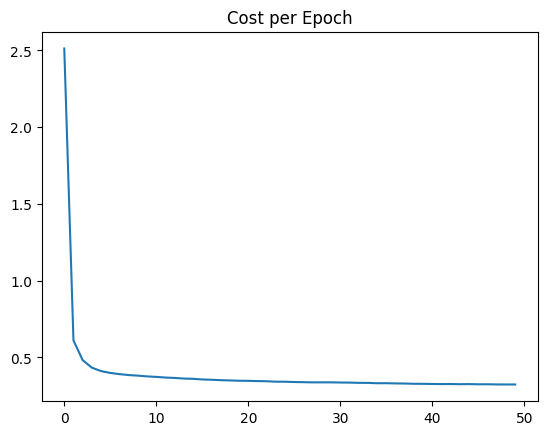

In [12]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Cost per Epoch");

In [13]:
model.evaluate(X_test, y_test, verbose=0) # gives MSE on test data

0.4965722858905792

In [14]:
predictions = model.predict(X_test)

194/194 [==============================] - 0s 943us/step


In [15]:
predictions_df = pd.DataFrame(y_test, columns=['Actual Values'])
predictions = pd.Series(predictions.reshape(predictions.shape[0],))
predictions_df = pd.concat([predictions_df, predictions], axis=1)
predictions_df.columns = ['Actual Values', 'Predictions']
predictions_df['Error'] = predictions_df['Predictions'] - predictions_df['Actual Values']
predictions_df['AbsError'] = predictions_df['Error'].abs()
predictions_df.head()

,Actual Values,Predictions,Error,AbsError
0,4.06200,3.420175,-0.641825,0.641825
1,5.00001,5.399247,0.399237,0.399237
2,1.22900,1.168025,-0.060975,0.060975
3,2.09100,2.452963,0.361963,0.361963
4,5.00001,4.633617,-0.366393,0.366393


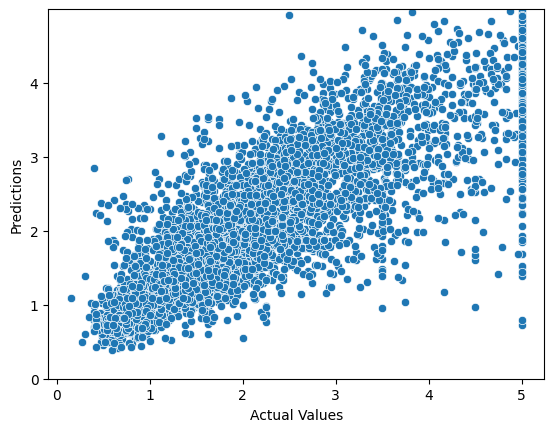

In [16]:
fig, ax = plt.subplots()
sns.scatterplot(x='Actual Values', y='Predictions', data=predictions_df, ax=ax)
ax.set_ylim(0,5)
ax.set_yticks(range(0,5))

<Axes: xlabel='Error', ylabel='Count'>

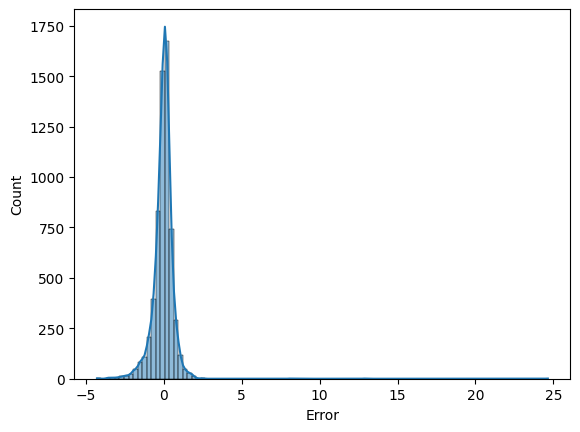

In [17]:
sns.histplot(predictions_df['Error'], bins=100, kde=True)

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predictions_df['Actual Values'], predictions_df['Predictions']) # should match MSE given by model.evaluate()

0.4965723664609925

In [19]:
predictions_df['AbsError'].mean()

0.41969396073893217

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions_df['Actual Values'], predictions_df['Predictions']) # should match MAE in cell above

0.41969396073893217